In [165]:
from ultralytics import YOLO
from PIL import Image
import torch
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry

In [166]:
DEVICE = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(DEVICE)

mps


In [167]:
def show_mask(mask, ax):
    color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[:,0], box[:,1]
    w, h = box[:,2] - box[:,0], box[:,3] - box[:,1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   

In [168]:
YOLO_PATH='../../Models/yolov8n.pt'
SAM_MODEL_TYPE='vit_b'
SAM_PATH='../../Models//sam_vit_b_01ec64.pth'

In [169]:
IMAGE="./plane.jpg"
image_mat = cv2.imread(IMAGE)
image_mat = cv2.cvtColor(image_mat, cv2.COLOR_BGR2RGB)

In [170]:
model = YOLO(YOLO_PATH).to(DEVICE)
results = model.predict(source=image_mat, save=True)

NotImplementedError: The operator 'torchvision::nms' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

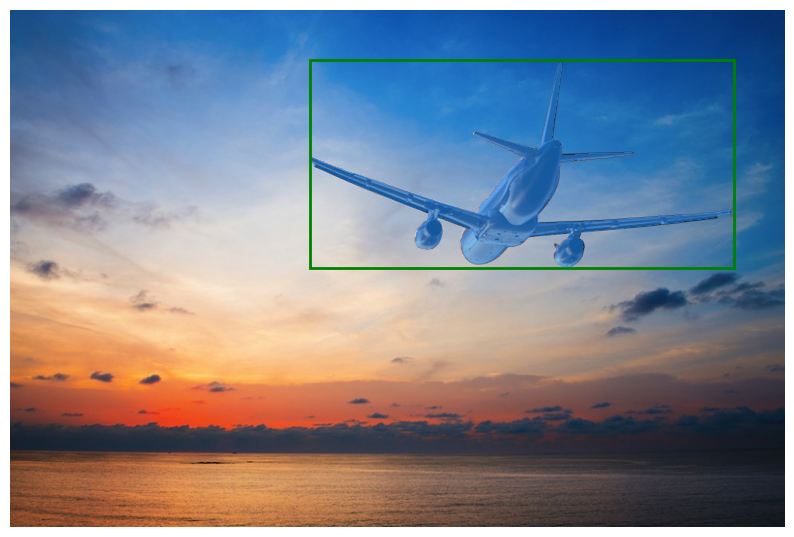

In [ ]:
sam = sam_model_registry[SAM_MODEL_TYPE](checkpoint=SAM_PATH).to(DEVICE)
predictor = SamPredictor(sam)
predictor.set_image(image_mat)

In [ ]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=results[0].boxes.data.numpy()[:,0:-2],
    multimask_output=False,
)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_mat)
show_mask(masks[0], plt.gca())
show_box(results[0].boxes.data.numpy()[:,0:-2], plt.gca())
plt.axis('off')
plt.show()